Data preprocessing


In [2]:
import re
import os
import pandas as pd
from os import listdir
from os.path import isfile, join
pd.set_option('mode.chained_assignment',  None)
pd.set_option("display.max_rows", 200)


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# # 2017_KBO_df

# os.chdir("C://Users//nhw85//KBO_crawler//data//2020")
# merged_df = pd.DataFrame()
# for data_file in os.listdir():
#     if not data_file.endswith('.csv'):
#         continue

#     abspath = os.path.abspath(data_file)
#     prp_df = pd.read_csv(abspath, encoding='cp949', on_bad_lines='skip')
#     prp_df
    
#     df = prp_df
#     df = df[~df['pitch_result'].isna()]
#     df['previous_pitch_result'] = df['pitch_result'].shift(1)
#     df['is_sequence_start'] = (df['pitcher_ID'] != df['pitcher_ID'].shift(1)) | (df['batter_ID'] != df['batter_ID'].shift(1))

#     df['sequence_id'] = df['is_sequence_start'].cumsum()
    
#     merged_sequences = df.groupby(['sequence_id'])['pitch_result']
#     merged_sequences.agg(lambda x: " ".join(x))
    
#     new_df = pd.merge(df.drop_duplicates('sequence_id', keep = 'last'), merged_sequences.agg(lambda x: " ".join(x)), on='sequence_id')
#     new_df
    
#     # itch_result_x	pa_result	pa_result_detail	previous_pitch_result	is_sequence_start	sequence_id	pitch_result_y
#     prp_df = new_df[['gameID','pitcher','batter', 'pitcher_ID','batter_ID', 'pitch_result_x', 'pa_result', 'pa_result_detail','pitch_result_y', 'sequence_id']]
#     prp_df
    
    
#     if os.path.basename(abspath):
#         merged_df = pd.concat([merged_df, prp_df], axis = 0, ignore_index=True)
#         merged_df.to_csv('2020'+'_' + "KBO_total" + '.csv', encoding = 'utf-8')

#### 네이버 야구 중계 경기별 데이터 (2017-2020)

In [4]:
df_2017 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2017//2017_KBO_total.csv", index_col=0)
len(df_2017[df_2017['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 108개

nan_batter_ID = df_2017[df_2017['batter_ID'].isna()==True]
df_2017 = df_2017.drop(nan_batter_ID.index, axis = 0)
df_2017['batter_ID'] = df_2017['batter_ID'].astype('int')
df_2017.head()

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20170331HHOB02017,니퍼트,김원석,61240,62768,타격,안타,안타,타격,1
1,20170331HHOB02017,니퍼트,장민석,61240,71347,타격,희생번트,희생번트,타격,2
2,20170331HHOB02017,니퍼트,김태균,61240,71752,볼,볼넷,볼넷,볼 볼 파울 볼 볼,3
3,20170331HHOB02017,니퍼트,로사리오,61240,66740,타격,필드 아웃,라인드라이브 아웃,헛스윙 헛스윙 타격,4
4,20170331HHOB02017,비야누에바,민병헌,67742,76249,헛스윙,삼진,삼진,볼 볼 스트라이크 헛스윙 파울 헛스윙,5


In [5]:
df_2018 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2018//2018_KBO_total.csv", index_col=0)
# len(df_2018[df_2018['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 0개
# len(df_2018[df_2018['pitcher_ID'].isna()==True]) # pitcher_ID가 NAN 값인 사람 삭제 필요 0개

df_2018['batter_ID'] = df_2018['batter_ID'].astype('int')
df_2018.head()

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20180324HHWO02018,로저스,이용규,65742,74163,스트라이크,삼진,삼진,헛스윙 스트라이크 스트라이크,1
1,20180324HHWO02018,로저스,양성우,65742,62797,타격,필드 아웃,플라이 아웃,볼 볼 스트라이크 타격,2
2,20180324HHWO02018,로저스,송광민,65742,76753,타격,안타,안타,타격,3
3,20180324HHWO02018,로저스,김태균,65742,71752,타격,안타,안타,볼 볼 타격,4
4,20180324HHWO02018,로저스,하주석,65742,62700,타격,안타,안타,볼 헛스윙 헛스윙 타격,5


In [6]:
df_2019 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2019//2019_KBO_total.csv", index_col=0)
# len(df_2019[df_2019['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 67개
# len(df_2018[df_2019['pitcher_ID'].isna()==True]) # pitcher_ID가 NAN 값인 사람 삭제 필요 1개

nan_batter_ID = df_2019[df_2019['batter_ID'].isna()==True]
nan_pitcher_ID = df_2019[df_2019['pitcher_ID'].isna()==True]

df_2019 = df_2019.drop(nan_batter_ID.index, axis = 0)
df_2019 = df_2019.drop(nan_pitcher_ID.index, axis = 0)

df_2019['batter_ID'] = df_2019['batter_ID'].astype('int')
df_2019['pitcher_ID'] = df_2019['pitcher_ID'].astype('int')
df_2019.head()

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20190323HHOB02019,린드블럼,정근우,65543,75808,타격,내야안타,내야안타,스트라이크 헛스윙 볼 타격,1
1,20190323HHOB02019,린드블럼,송광민,65543,76753,타격,필드 아웃,파울 플라이 아웃,타격,2
2,20190323HHOB02019,린드블럼,호잉,65543,68730,타격,안타,안타,헛스윙 스트라이크 볼 볼 타격,3
3,20190323HHOB02019,린드블럼,김태균,65543,71752,타격,안타,안타,볼 파울 볼 타격,4
4,20190323HHOB02019,린드블럼,이성열,65543,73136,타격,포스 아웃,땅볼 아웃,볼 타격,5


In [7]:
df_2020 = pd.read_csv("C://Users//nhw85//KBO_crawler//data//2020//2020_KBO_total.csv", index_col=0)
# len(df_2020[df_2020['batter_ID'].isna()==True]) # batter_ID가 NAN 값인 사람 삭제 필요 9개
# len(df_2020[df_2020['pitcher_ID'].isna()==True]) # pitcher_ID가 NAN 값인 사람 삭제 필요 11개

nan_batter_ID = df_2020[df_2020['batter_ID'].isna()==True]
nan_pitcher_ID = df_2020[df_2020['pitcher_ID'].isna()==True]
nan_pitcher_ID

df_2020 = df_2020.drop(nan_pitcher_ID.index, axis = 0)


df_2020['batter_ID'] = df_2020['batter_ID'].astype('int')
df_2020['pitcher_ID'] = df_2020['pitcher_ID'].astype('int')
df_2020.head()

,gameID,pitcher,batter,pitcher_ID,batter_ID,pitch_result_x,pa_result,pa_result_detail,pitch_result_y,sequence_id
0,20200505HHSK02020,킹엄,이용규,50815,74163,타격,포스 아웃,땅볼 아웃,볼 스트라이크 볼 스트라이크 파울 타격,1
1,20200505HHSK02020,킹엄,정은원,50815,68743,타격,2루타,2루타,스트라이크 스트라이크 파울 타격,2
2,20200505HHSK02020,킹엄,호잉,50815,68730,타격,필드 아웃,플라이 아웃,볼 타격,3
3,20200505HHSK02020,킹엄,이성열,50815,73136,헛스윙,삼진,낫아웃 삼진,스트라이크 스트라이크 헛스윙,4
4,20200505HHSK02020,서폴드,노수광,69744,63704,타격,포스 아웃,땅볼 아웃,볼 스트라이크 스트라이크 타격,5


In [13]:
# # final file 만들기
# os.chdir("C://Users//nhw85//KBO_crawler//data//final")
# df_2017.to_csv('2017'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')
# df_2018.to_csv('2018'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')
# df_2019.to_csv('2019'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')
# df_2020.to_csv('2020'+'_' + "KBO_final" + '.csv', encoding = 'utf-8')

# batter|pitcher_2vec

In [14]:
import re

from os import listdir
from os.path import isfile, join

data_directory = "C://Users//nhw85//KBO_crawler//data//final"
data_files = [f for f in listdir(data_directory) if isfile(join(data_directory, f))]

at_bats = {}
home_runs = {}
singles = {}
doubles = {}
triples = {}

counts = {"batter": {}, "pitcher": {}}

data = {}
train_years = ["2017", "2018", "2019"]
test_year = "2020"
for year in train_years + [test_year]:
    data[year] = []
# year_match = r"20(17|18|19|20)"
year_match = r"20\d\d"

In [15]:
os.chdir('C://Users//nhw85//KBO_crawler//data//final')

In [16]:
data_files

['2017_KBO_final.csv',
 '2018_KBO_final.csv',
 '2019_KBO_final.csv',
 '2020_KBO_final.csv']

In [17]:
import string

for data_file in data_files:
    year_re = re.search(year_match, data_file)
    # year_re = re.search(year_match, data_file)
    # if year_re is None:
    #     continue
    year = year_re.group()
        
    # Skip non-event files.
    if not (".csv" in data_file):
        continue
    
    f = open(join(data_directory, data_file))
    pitcher = None
    line = f.readline().strip() 

    while line != "":
        parts = line.split(",")
        
        # Get starting pitchers.
        if parts[1] == "gameID":
            while parts[-1] != "":
                line = f.readline().strip()
                if not line:
                    break
                parts = line.split(",")
            
                pitcher = parts[4] # pitcher_ID
            
                batter = parts[5] # batter_ID

                outcome = ""
                
                play = ''
                
                # Handle balks, intentional, walks, hit by a pitch,
                # strike outs, and walks..
                
                _ini_history:str = parts[-2] # ex. 타격..
                ini_history:list = _ini_history.split()
                
                if ini_history[-1]:
                    if '볼'== ini_history[-1]:
                        if parts[-4]:
                            play = parts[-5] +'-'+ "".join(parts[-4].split()) +'-'+ "".join(parts[-3].split())
                        else:
                            pass
                                

                    elif '스트라이크' == ini_history[-1]:
                        if parts[-4]:
                            play = parts[-5] +'-'+ "".join(parts[-4].split()) +'-'+ "".join(parts[-3].split())
                        else:
                            pass
                                
                        
                                
                    if play:
                        outcome = f"p_{play} "
                        


                    if "타격" == ini_history[-1]:
                        play = parts[-5] +'-'+ "".join(parts[-4].split()) +'-'+ "".join(parts[-3].split())
                        if "홈런" in play:
                            play = "홈런"
                        elif "안타" in play:
                            play = '안타'
                        elif "2루타" in play:
                            play = "2루타"
                        elif "3루타" in play:
                            play = '3루타'
                        
                        if play:
                            outcome = f"h_{play} "
                            
                        
                        if play == '홈런':
                            home_runs[batter] = home_runs.get(batter, 0) + 1
                        elif play == '안타':
                            singles[batter] = singles.get(batter, 0) + 1
                        elif play == '2루타':
                            doubles[batter] = doubles.get(batter, 0) + 1
                        elif play == '3루타':
                            triples[batter] = triples.get(batter, 0) + 1
                    
                    
                    if "헛스윙" == ini_history[-1]:
                        if parts[-4]:
                            play = parts[-5] +'-'+ "".join(parts[-4].split()) +'-'+ "".join(parts[-3].split())
                        else:
                            pass

                
                        if play:
                            outcome = f"h_{play} "
                        

                            

                    
                outcome = outcome.strip()
                                
                            
                        
                # Ignore catcher interference and ambiguous singles.
                if not '실책' in outcome and outcome != "":
                    data[year].append({"batter": batter, "pitcher": pitcher, "outcome": outcome})
                    at_bats[batter] = at_bats.get(batter, 0) + 1
                    counts["batter"][batter] = counts["batter"].get(batter, 0) + 1
                    counts["pitcher"][pitcher] = counts["pitcher"].get(pitcher, 0) + 1
        
                line = f.readline().strip()
            
            f.close()

## Data Preprocessing

OK, now that we have our raw data, we're going to establish some cutoffs so that we're only analyzing players with a reasonable number of observations. Let's just focus on the most frequent batters and pitchers who were involved in 90% of the at-bats.

In [18]:
cutoffs = {}
percentile_cutoff = 0.9
for player_type in ["batter", "pitcher"]:
    counts_list = list(counts[player_type].values())
    counts_list.sort(reverse = True)
    total_at_bats = sum(counts_list)

    cumulative_percentage = [sum(counts_list[:i + 1]) / total_at_bats for i in range(len(counts_list))]
    cutoff_index = sum([1 for total in cumulative_percentage if total <= percentile_cutoff])

    cutoff = counts_list[cutoff_index]
    cutoffs[player_type] = cutoff
    print("Original: {0}\tNew: {1}\tProportion: {2:.2f}".format(
            len(counts[player_type]), cutoff_index, cutoff_index / len(counts[player_type])))

Original: 466	New: 182	Proportion: 0.39
Original: 473	New: 232	Proportion: 0.49


As you can see, only 39% of batters and 49% of pitchers were involved in 90% of at-bats. Let's use these new cutoff points to build the final data set.

In [19]:
final_data = []
original_data = 0
matchups = set()
for year in train_years: # 17,18,19

    original_data += len(data[year])

    for sample in data[year]:

        batter = sample["batter"]
        pitcher = sample["pitcher"]
        matchups.add("{0}_{1}".format(batter, pitcher))

        if counts["batter"][batter] >= cutoffs["batter"] and counts["pitcher"][pitcher] >= cutoffs["pitcher"]:
            final_data.append(sample)



print("Original: {0}\tReduced: {1}".format(original_data, len(final_data)))
print("{0:.2f}% of original data set.".format(len(final_data) / original_data))

Original: 83799	Reduced: 70097
0.84% of original data set.


As you can see, we still retain a large amount of data even after removing infrequent batters and pitchers. Next, we're going to associate an integer index with each of our batters, pitchers, and outcomes, respectively.

In [20]:
import random

FAV_NUM = 2010
random.seed(FAV_NUM)
random.shuffle(final_data) # final_data 에는 17,18,19 만 존재.

# cf) final_data[0] = {'batter': '71752', 'pitcher': '61240', 'outcome': 'h_볼-볼넷-볼넷'}

categories = {"batter": set(), "pitcher": set(), "outcome": set()}
for sample in final_data:
    categories["batter"].add(sample["batter"])
    categories["pitcher"].add(sample["pitcher"])
    categories["outcome"].add(sample["outcome"])

for column in categories: # column = 'batter', 'pitcher' and ' outcome'
    categories[column] = list(categories[column]) # list(categories[column] = ['71752']
    categories[column].sort()

NUM_OUTCOMES = len(categories["outcome"])
print("NUM_OUTCOMES: {0}".format(NUM_OUTCOMES))
print(" ".join(categories["outcome"]))

category_to_int = {}
for column in categories:
    category_to_int[column] = {categories[column][i]: i for i in range(len(categories[column]))}

NUM_OUTCOMES: 29
h_2루타 h_3루타 h_안타 h_타격-병살타-병살타 h_타격-삼중살-삼중살 h_타격-야수선택-야수선택 h_타격-야수선택-희생번트야수선택 h_타격-타구맞음아웃-타구맞음아웃 h_타격-포스아웃-땅볼아웃 h_타격-필드아웃-라인드라이브아웃 h_타격-필드아웃-번트아웃 h_타격-필드아웃-인필드플라이 h_타격-필드아웃-파울플라이아웃 h_타격-필드아웃-플라이아웃 h_타격-희생번트-희생번트 h_타격-희생플라이-희생플라이 h_헛스윙-낫아웃출루-낫아웃다른주자포스아웃 h_헛스윙-낫아웃출루-낫아웃포일 h_헛스윙-낫아웃출루-낫아웃폭투 h_헛스윙-삼진-낫아웃삼진 h_헛스윙-삼진-삼진 h_홈런 p_볼-고의4구-고의4구 p_볼-몸에맞는볼-몸에맞는볼 p_볼-볼넷-볼넷 p_볼-자동고의4구-자동고의4구 p_스트라이크-삼진-낫아웃삼진 p_스트라이크-삼진-삼진 p_스트라이크-자동고의4구-자동고의4구


100%|██████████| 3/3 [00:00<00:00, 25.19it/s]


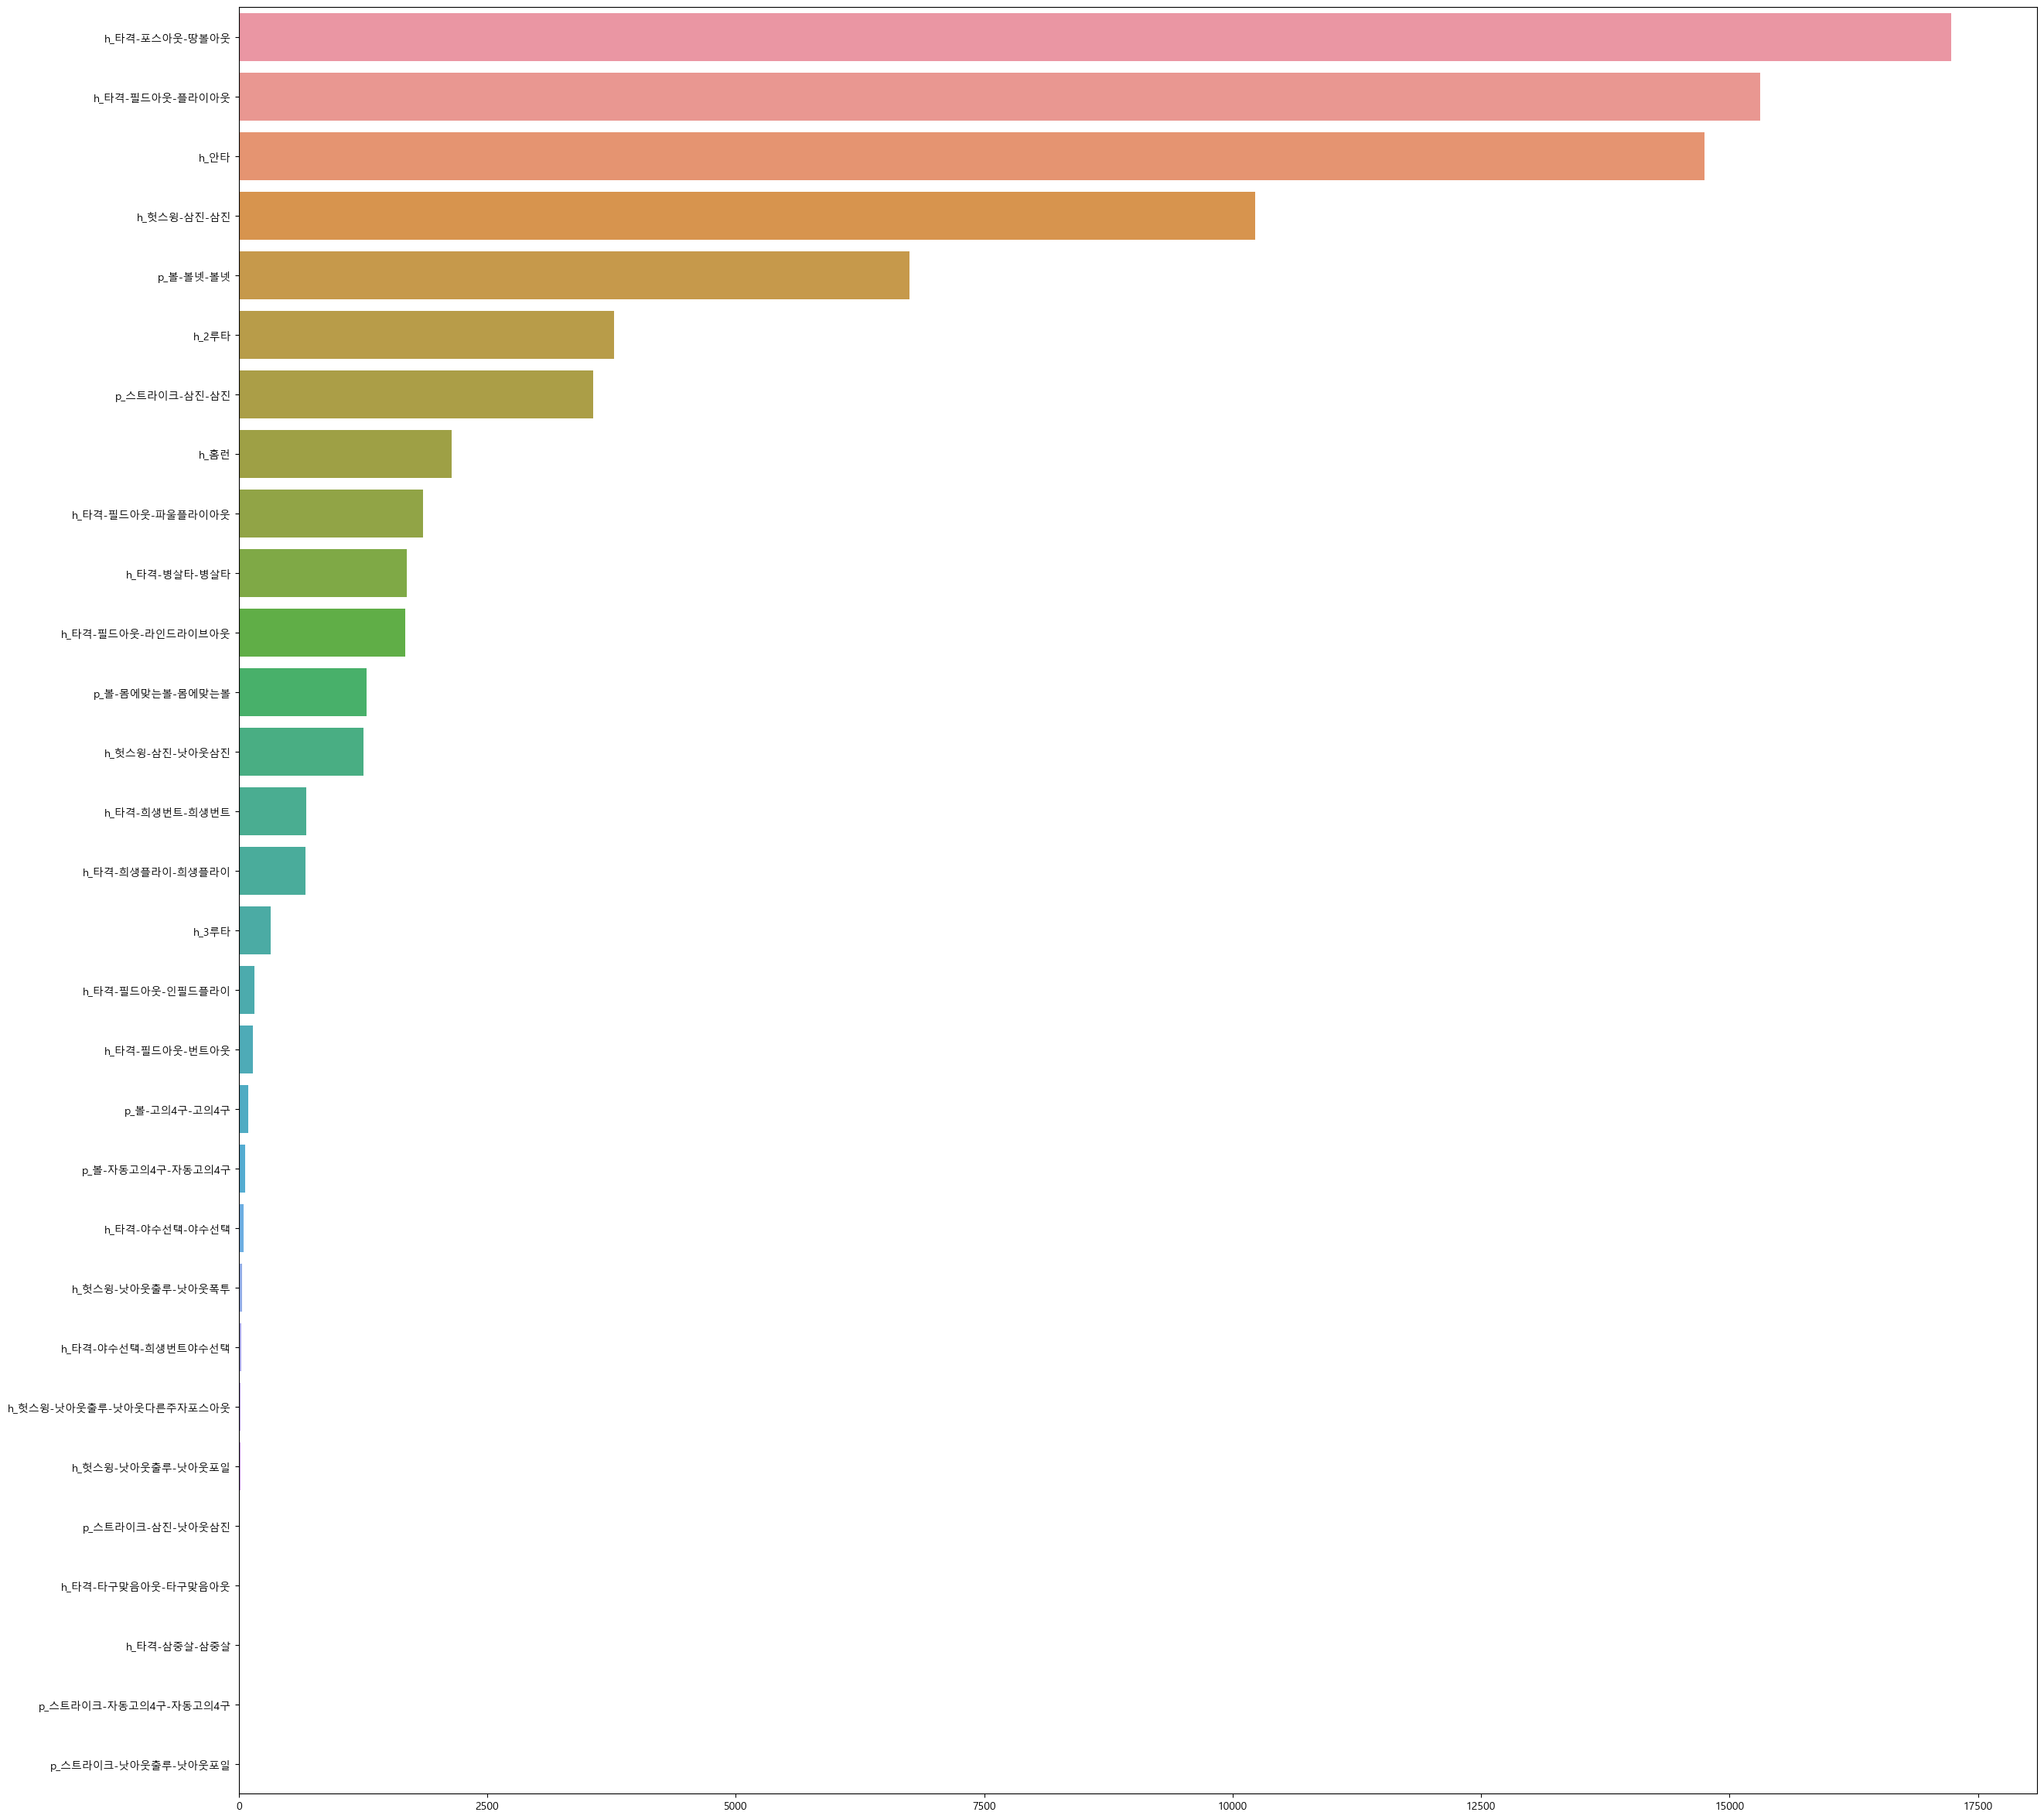

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

outcome_counts = {}
for year in tqdm(train_years): # 17,18,19
    for sample in tqdm(data[year]):
        outcome = sample["outcome"]
        outcome_counts[outcome] = outcome_counts.get(outcome, 0) + 1

outcome_counts = list(outcome_counts.items())
outcome_counts.sort(key = lambda x: x[1], reverse = True) # ex. ('h_타격-포스아웃-땅볼아웃', 17231) => 높은 빈도수대로 정렬
val = [x[1] for x in outcome_counts] # 17231
symbols = [x[0] for x in outcome_counts] # h_타격-포스아웃-땅볼아웃
pos = range(len(outcome_counts)) 

fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
ax = sns.barplot(x = val, y = symbols)
plt.show()

We'll then use these newly defined integer indices to build the appropriate NumPy arrays for our model.

In [22]:
final_data[0]

{'batter': '75847', 'pitcher': '65769', 'outcome': 'h_홈런'}

In [23]:
import numpy as np

np.random.seed(FAV_NUM)

from keras.utils import np_utils

data_sets = {"batter": [], "pitcher": [], "outcome": []}
for sample in final_data: # ex) {'batter': '75847', 'pitcher': '65769', 'outcome': 'h_홈런'}
    for column in sample:
        value = sample[column]
        value_index = category_to_int[column][value]
        data_sets[column].append([value_index]) # ex) batter의 ID 가 아니라 인덱스 번호가 들어감.

for column in ["batter", "pitcher"]:
    data_sets[column] = np.array(data_sets[column])

data_sets["outcome"] = np_utils.to_categorical(np.array(data_sets["outcome"]), NUM_OUTCOMES) # ??

# Building and Training the Model

And now we're ready to train our model. We'll save the weights at the end of training.

#### optimizer SGD

Embedding()의 대표적인 인자

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- input_length = 입력 시퀀스의 길이

SGD

- keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
- 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 옵티마이저.
=> 모멘텀과 네스테로프 모멘텀(Nesterov momentum), 그리고 학습률 감소 기법(learning rate decay)을 지원.

인자

- lr: 0보다 크거나 같은 float 값. 학습률.
- momentum: 0보다 크거나 같은 float 값. SGD를 적절한 방향으로 가속화하며, 흔들림(진동)을 줄여주는 매개변수
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율
- nesterov: 불리언. 네스테로프 모멘텀의 적용 여부를 설정

- nesterov? 현재 파리미터 위치에서 앞쪽의 그래디언트를 구한다는 것.

In [24]:
from keras import optimizers
from keras.layers import Activation, concatenate, Dense, Dropout, Embedding, Input, Reshape
from keras.models import Model

NUM_BATTERS = len(categories["batter"])
NUM_PITCHERS = len(categories["pitcher"])
VEC_SIZE = 9 # vec_size
ACTIVATION = "sigmoid"

batter_idx = Input(shape = (1, ), dtype = "int32", name = "batter_idx")
batter_embed = Embedding(NUM_BATTERS, VEC_SIZE, input_length = 1)(batter_idx) # output (input_length, VEC_SIZE)
batter_embed = Reshape((VEC_SIZE, ), name = "batter_embed")(batter_embed)
batter_embed = Activation(ACTIVATION)(batter_embed)

pitcher_idx = Input(shape = (1, ), dtype = "int32", name = "pitcher_idx")
pitcher_embed = Embedding(NUM_PITCHERS, VEC_SIZE, input_length = 1)(pitcher_idx)
pitcher_embed = Reshape((VEC_SIZE, ), name = "pitcher_embed")(pitcher_embed)
pitcher_embed = Activation(ACTIVATION)(pitcher_embed)

batter_pitcher = concatenate([batter_embed, pitcher_embed], name = "batter_pitcher")

output = Dense(NUM_OUTCOMES, activation = "softmax")(batter_pitcher) # NUM_OUTCOMES = 29개 / cf) NUM_BATTERS = 178, NUM_PITCHERS == 221 

model = Model(inputs = [batter_idx, pitcher_idx], outputs = [output]) 
sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = "categorical_crossentropy")

Epoch 1/100
694/694 - 2s - loss: 2.3601 - val_loss: 2.2692 - 2s/epoch - 3ms/step
Epoch 2/100
694/694 - 1s - loss: 2.2899 - val_loss: 2.2637 - 1s/epoch - 2ms/step
Epoch 3/100
694/694 - 1s - loss: 2.2866 - val_loss: 2.2633 - 1s/epoch - 2ms/step
Epoch 4/100
694/694 - 1s - loss: 2.2853 - val_loss: 2.2609 - 1s/epoch - 2ms/step
Epoch 5/100
694/694 - 1s - loss: 2.2845 - val_loss: 2.2592 - 1s/epoch - 2ms/step
Epoch 6/100
694/694 - 1s - loss: 2.2839 - val_loss: 2.2589 - 1s/epoch - 2ms/step
Epoch 7/100
694/694 - 1s - loss: 2.2837 - val_loss: 2.2613 - 1s/epoch - 2ms/step
Epoch 8/100
694/694 - 1s - loss: 2.2834 - val_loss: 2.2578 - 1s/epoch - 1ms/step
Epoch 9/100
694/694 - 1s - loss: 2.2827 - val_loss: 2.2581 - 1s/epoch - 2ms/step
Epoch 10/100
694/694 - 1s - loss: 2.2827 - val_loss: 2.2583 - 1s/epoch - 2ms/step
Epoch 11/100
694/694 - 1s - loss: 2.2823 - val_loss: 2.2581 - 983ms/epoch - 1ms/step
Epoch 12/100
694/694 - 1s - loss: 2.2819 - val_loss: 2.2576 - 1s/epoch - 2ms/step
Epoch 13/100
694/694 -

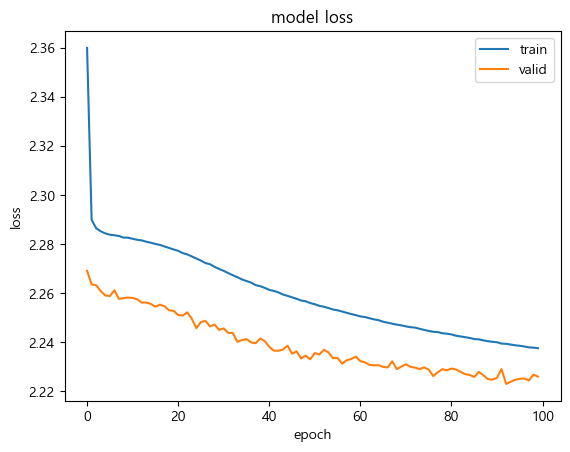

In [25]:
BATCH_SIZE = 100
NUM_EPOCHS = 100
VALID = True
validation_split = 0.0
callbacks = None

if VALID:
    from keras.callbacks import ModelCheckpoint
    validation_split = 0.01
    callbacks = [ModelCheckpoint("weights.h5", save_best_only = True, save_weights_only = True)]

X_list = [data_sets["batter"], data_sets["pitcher"]]
y = data_sets["outcome"]
history = model.fit(X_list, y, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE,
                    verbose = 2, shuffle = True, callbacks = callbacks, validation_split = validation_split)
if not VALID:
    model.save_weights("weights.h5")

model.load_weights("weights.h5")
if VALID:
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc = "upper right")
    plt.show()

#### optimizer Adam

In [26]:
from keras import optimizers
from keras.layers import Activation, concatenate, Dense, Dropout, Embedding, Input, Reshape
from keras.models import Model

NUM_BATTERS = len(categories["batter"])
NUM_PITCHERS = len(categories["pitcher"])
VEC_SIZE = 9
ACTIVATION = "sigmoid"

batter_idx = Input(shape = (1, ), dtype = "int32", name = "batter_idx")
batter_embed = Embedding(NUM_BATTERS, VEC_SIZE, input_length = 1)(batter_idx)
batter_embed = Reshape((VEC_SIZE, ), name = "batter_embed")(batter_embed)
batter_embed = Activation(ACTIVATION)(batter_embed)

pitcher_idx = Input(shape = (1, ), dtype = "int32", name = "pitcher_idx")
pitcher_embed = Embedding(NUM_PITCHERS, VEC_SIZE, input_length = 1)(pitcher_idx)
pitcher_embed = Reshape((VEC_SIZE, ), name = "pitcher_embed")(pitcher_embed)
pitcher_embed = Activation(ACTIVATION)(pitcher_embed)

batter_pitcher = concatenate([batter_embed, pitcher_embed], name = "batter_pitcher")

output = Dense(NUM_OUTCOMES, activation = "softmax")(batter_pitcher)

model = Model(inputs = [batter_idx, pitcher_idx], outputs = [output])
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ['acc'])

Epoch 1/100
694/694 - 2s - loss: 2.4652 - acc: 0.1920 - val_loss: 2.2708 - val_acc: 0.2097 - 2s/epoch - 3ms/step
Epoch 2/100
694/694 - 1s - loss: 2.2856 - acc: 0.2075 - val_loss: 2.2583 - val_acc: 0.2097 - 1s/epoch - 2ms/step
Epoch 3/100
694/694 - 1s - loss: 2.2770 - acc: 0.2109 - val_loss: 2.2531 - val_acc: 0.2183 - 1s/epoch - 2ms/step
Epoch 4/100
694/694 - 1s - loss: 2.2721 - acc: 0.2150 - val_loss: 2.2475 - val_acc: 0.2183 - 1s/epoch - 2ms/step
Epoch 5/100
694/694 - 1s - loss: 2.2676 - acc: 0.2193 - val_loss: 2.2451 - val_acc: 0.2197 - 1s/epoch - 2ms/step
Epoch 6/100
694/694 - 1s - loss: 2.2632 - acc: 0.2239 - val_loss: 2.2401 - val_acc: 0.2268 - 1s/epoch - 2ms/step
Epoch 7/100
694/694 - 1s - loss: 2.2593 - acc: 0.2268 - val_loss: 2.2394 - val_acc: 0.2282 - 1s/epoch - 2ms/step
Epoch 8/100
694/694 - 1s - loss: 2.2554 - acc: 0.2300 - val_loss: 2.2364 - val_acc: 0.2197 - 1s/epoch - 2ms/step
Epoch 9/100
694/694 - 1s - loss: 2.2521 - acc: 0.2305 - val_loss: 2.2334 - val_acc: 0.2225 - 1s/

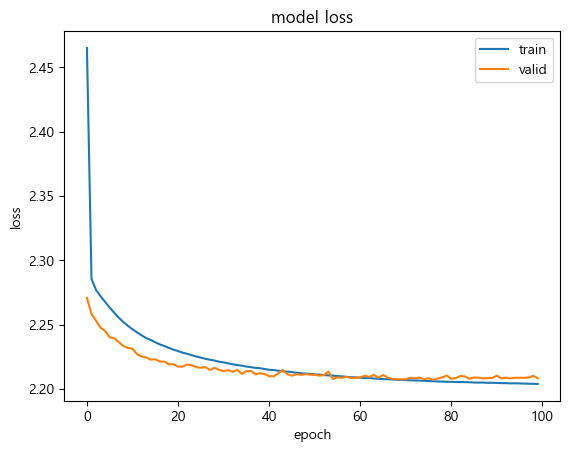

In [27]:
BATCH_SIZE = 100
NUM_EPOCHS = 100
VALID = True
validation_split = 0.0
callbacks = None
if VALID:
    from keras.callbacks import ModelCheckpoint
    validation_split = 0.01
    callbacks = [ModelCheckpoint("weights.h6", save_best_only = True, save_weights_only = True)]

X_list = [data_sets["batter"], data_sets["pitcher"]]
y = data_sets["outcome"]
history = model.fit(X_list, y, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE,
                    verbose = 2, shuffle = True, callbacks = callbacks, validation_split = validation_split)
if not VALID:
    model.save_weights("weights.h6")

model.load_weights("weights.h6")
if VALID:
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc = "upper right")
    plt.show()

We'll also train a logistic regression model so that we have something to compare to <code>(batter|pitcher)2vec</code>.

In [28]:
TRAIN_ALT = True
alt_model = None

if TRAIN_ALT:
    from scipy.sparse import csr_matrix, hstack
    from sklearn.linear_model import LogisticRegression

    X_batters = csr_matrix(np_utils.to_categorical(np.array(data_sets["batter"]), NUM_BATTERS))
    X_pitchers = csr_matrix(np_utils.to_categorical(np.array(data_sets["pitcher"]), NUM_PITCHERS))
    X = hstack([X_batters, X_pitchers]) # array를 가로로 결합.
    y = np.argmax(data_sets["outcome"], axis = 1)  # 전체 배열에서 가장 높은 값을 가진 요소의 인덱스 배열
    alt_model = LogisticRegression(n_jobs = -1)
    results = alt_model.fit(X, y)

# Qualitative Analysis of Player Vectors

Having trained the model, let's go ahead and fetch the distributed representations for all players. To do so, we need to define some functions that return a vector when provided with a player's integer index.

In [31]:
from keras import backend

get_batter_vec = backend.function([batter_idx], [batter_embed])
get_pitcher_vec = backend.function([pitcher_idx], [pitcher_embed])

# Retrieve distributed representation of players.
batter_vecs = get_batter_vec([np.array(range(NUM_BATTERS)).reshape((NUM_BATTERS, 1))])[0]
pitcher_vecs = get_pitcher_vec([np.array(range(NUM_PITCHERS)).reshape((NUM_PITCHERS, 1))])[0]
player_vecs = {"batter": batter_vecs, "pitcher": pitcher_vecs}

Alright, let's find out if these representations are revealing anything interesting. First, let's collect some information about the players.

In [ ]:
# Jung = pd.read_csv("C://Users//nhw85//Downloads//personal_player_info_pos2017_2023.csv", index_col = 0)
# Jung['player_id'] = Jung['player_id'].astype('int')
# Jung.to_csv('final_personal_info(jung)' + '2017_2023' + '.csv', encoding = 'utf-8')

In [34]:
# Retrieve player data.
player_data = {}

f = open("C://Users//nhw85//OneDrive//바탕 화면//[KBO] Batter_Pitcher2vec//personal_player_ifo  (2017_2023).csv")
for line in f:
    parts = line.strip().split(",")
    # print(parts)
    if parts[1] != 'player':
        name = parts[1]
        player_id = parts[2]
        throwing_hand = parts[-1]
        batting_hand = parts[-2]
        # position = parts[-1]
        player_data[player_id] = {"name": name, "batting_hand": batting_hand,
                                    "throwing_hand": throwing_hand}

In [35]:
print(player_data) # 논문과 다른 것은 position 컬럼이 없다는 것 # 포지션 추가해야한다!!!!

{'61240': {'name': '니퍼트', 'batting_hand': '우투', 'throwing_hand': 'P'}, '67742': {'name': '비야누에바', 'batting_hand': '우투', 'throwing_hand': 'P'}, '74731': {'name': '송창식', 'batting_hand': '우투', 'throwing_hand': 'P'}, '99737': {'name': '박정진', 'batting_hand': '좌투', 'throwing_hand': 'P'}, '79764': {'name': '장민재', 'batting_hand': '우투', 'throwing_hand': 'P'}, '73226': {'name': '김성배', 'batting_hand': '우언', 'throwing_hand': 'P'}, '66643': {'name': '헥터', 'batting_hand': '우투', 'throwing_hand': 'P'}, '61365': {'name': '김대우', 'batting_hand': '우투', 'throwing_hand': 'P'}, '77446': {'name': '백정현', 'batting_hand': '좌투', 'throwing_hand': 'P'}, '66492': {'name': '김승현', 'batting_hand': '우투', 'throwing_hand': 'P'}, '67443': {'name': '장지훈', 'batting_hand': '우투', 'throwing_hand': 'P'}, '60636': {'name': '심동섭', 'batting_hand': '좌투', 'throwing_hand': 'P'}, '74630': {'name': '박근홍', 'batting_hand': '좌투', 'throwing_hand': 'P'}, '62754': {'name': '임기영', 'batting_hand': '우언', 'throwing_hand': 'P'}, '65856': {'name': 

## t-SNE

Next, we'll use the [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) algorithm to visualize the player vectors in two and three dimensions.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

NUM_PLAYERS = {"batter": NUM_BATTERS, "pitcher": NUM_PITCHERS}


def run_tsne(player_type):
    """Run t-SNE on the player vectors.

    :param player_type: 
    :return: 
    """
    params = {"batter": {"perplexity": 20, "learning_rate": 200, "init": "pca"},
              "pitcher": {"perplexity": 20, "learning_rate": 200, "init": "random"}}
    tsne = TSNE(n_components = 3, **params[player_type])
    manifold_3d = tsne.fit_transform(player_vecs[player_type])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = "3d")
    ax.scatter(manifold_3d[:, 0], manifold_3d[:, 1], manifold_3d[:, 2], color = "gray")
    
    plt.show()

    params = {"batter": {"perplexity": 20, "learning_rate": 550, "init": "pca"},
              "pitcher": {"perplexity": 20, "learning_rate": 200, "init": "random"}}
    tsne = TSNE(n_components = 2, **params[player_type])
    manifold_2d = tsne.fit_transform(player_vecs[player_type])
    (x, y) = (manifold_2d[:, 0], manifold_2d[:, 1])
    
    plt.scatter(x, y, color = "gray")
    interesting_batters = {"정수빈", "안치홍", "이대호", "나성범",
                           "김현수"}
    interesting_pitchers = {"유희관", "임창용", "송승준",
                            "장원삼", "오주원"}
    interesting_players = {"batter": interesting_batters, "pitcher": interesting_pitchers}
    
    for i in range(NUM_PLAYERS[player_type]):
        player_id = categories[player_type][i]
        player_name = player_data[player_id]["name"]
        if player_name in interesting_players[player_type]:
            plt.text(x[i], y[i], player_name, va = "top", family = "monospace")

    plt.show()
        
    return manifold_3d


tsne_batters = run_tsne("batter")
tsne_pitchers = run_tsne("pitcher")

## PCA

Let's also visualize the first few PCs of a [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) of the vectors and color them with various interesting properties.

- master csv 파일 형식
- playerID 와 retroID 가 함께 있는 데이터 프레임이 필요

- salary .csv 도 필요
- yearID, teamID, lgID, playerID, salary


In [ ]:
master = pd.read_csv("C://Users//nhw85//OneDrive//바탕 화면//master2017_2023.csv", index_col=0)
master 

In [ ]:
final_salary_info = pd.read_csv("C://Users//nhw85//OneDrive//바탕 화면//final_salary_info2017_2023.csv", index_col=0)
final_salary_info = final_salary_info.rename(columns = {"연도":'yearID', '팀':'team', '선수' : 'player', '연봉(만원)':'salary'})
final_salary_info['salary'] = final_salary_info['salary'].str.replace(",","")
final_salary_info['salary'] = final_salary_info['salary'].astype('int')
final_salary_info # salary 가 0인 선수들 208..!

# final_salary_info.to_csv('final_salary_info' +'_'+'2017_2023' + '.csv', encoding = 'utf-8')



In [ ]:
final_salary_info[final_salary_info['yearID'] == 2017]

In [ ]:
test_df = pd.merge(master, final_salary_info, left_on='playerID', right_on='playerID', how='left')
test_df = test_df[['playerID', 'retroID']]
# test_df.to_csv('test_master' + '2017_2023' + '.csv', encoding = 'utf-8')

- All arrays must be of the same length 라는 에러가 생김
- why? player ID 는 있으나 연봉 데이터는 없는 선수들도 있었기 때문에 수정이 필요하였다고 본다.
- 임시 방편으로 데이터를 줄여서 코드 작동 시켜봄.

In [ ]:
import csv
import pandas as pd

playerID_to_retroID = {}
reader = csv.DictReader(open("C://Users//nhw85//OneDrive//바탕 화면//test_master2017_2023.csv"))
for row in reader:
    playerID = row["playerID"]
    retroID = row["retroID"]
    playerID_to_retroID[playerID] = retroID

# # Get player salaries.
reader = csv.DictReader(open("C://Users//nhw85//OneDrive//바탕 화면//final_salary_info-2017_2023.csv"))
salaries = {}
for row in reader:
    # print(row) # {'': '0', 'yearID': '2017', 'team': 'KIA', 'player': '헥터', 'playerID': '66643', 'salary': '170000'}
    if row["yearID"] == '2017':
        playerID = row["playerID"]
        retroID = playerID_to_retroID[playerID]
        log_salary = np.log2(int(row["salary"]))
        salaries[retroID] = log_salary
        
# Set up other inteteresting data for coloring.
max_hr_rate = max([home_runs.get(batter_id, 0) / at_bats[batter_id] for batter_id in at_bats if batter_id in categories["batter"]])
max_single_rate = max([singles.get(batter_id, 0) / at_bats[batter_id] for batter_id in at_bats if batter_id in categories["batter"]])
max_double_rate = max([doubles.get(batter_id, 0) / at_bats[batter_id] for batter_id in at_bats if batter_id in categories["batter"]])
###########
max_triple_rate = max([triples.get(batter_id, 0) / at_bats[batter_id] for batter_id in at_bats if batter_id in categories["batter"]])
###########

# max_salary = max([salaries.get(batter_id, 0) for batter_id in at_bats if batter_id in categories["batter"]])



batter_colors = {"player_id": [], "hand": [], "Home Runs": [], "Singles": [], "Doubles": [], "triples": []}
for i in range(NUM_BATTERS):
    batter_id = categories["batter"][i]
    batting_hand = player_data[batter_id]["batting_hand"]
    batter_colors["player_id"].append(batter_id)
    batter_colors["hand"].append(batting_hand)
    # batter_colors["Home Runs"].append(str((home_runs.get(batter_id, 0) / at_bats[batter_id]) / max_hr_rate))
    batter_colors["Home Runs"].append(str(home_runs.get(batter_id, 0) / at_bats[batter_id]))
    batter_colors["Singles"].append(str(singles.get(batter_id, 0) / at_bats[batter_id]))
    batter_colors["Doubles"].append(str((doubles.get(batter_id, 0) / at_bats[batter_id]) / max_double_rate))
    batter_colors["triples"].append(str((triples.get(batter_id, 0) / at_bats[batter_id]) / max_triple_rate))
    # batter_colors["salary"].append(str((salaries.get(batter_id, 0) / max_salary)))

df = pd.DataFrame(batter_colors)

In [ ]:
from sklearn import decomposition

# Run PCA.
pca = decomposition.PCA()

pca.fit(batter_vecs)
print(pca.explained_variance_ratio_)
projected_batters = pca.transform(batter_vecs)

pca.fit(pitcher_vecs)
print(pca.explained_variance_ratio_)
projected_pitchers = pca.transform(pitcher_vecs)

In [ ]:
for i in range(3):
    df["pc{0}".format(i + 1)] = projected_batters[:, i] # 예측값

cmap = sns.cubehelix_palette(as_cmap = True)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = "3d")
# ax.scatter(projected_batters[:, 0], projected_batters[:, 1], projected_batters[:, 2], color = df["Home Runs"], cmap = cmap)
# ax.set_title("Batters")
# plt.show()

cs = sns.color_palette("hls", 8)
batting_hand_color = {"좌타": cs[0], "우타": cs[3], "양타": cs[5]}
legend_data = []
legend_names = []
for (hand, color) in batting_hand_color.items():
    batter_hands = df[df["hand"] == hand]
    legend_data.append(plt.scatter(batter_hands["pc2"], batter_hands["pc3"], s = 50, color = color)) # single, Double,
    legend_names.append(hand)

plt.title("Batting Hand")
plt.legend(legend_data, legend_names)
plt.show()

for batter_color in ["Singles", "Home Runs", "Doubles", "triples"]:
    (f, ax) = plt.subplots()
    points = ax.scatter(df["pc1"], df["pc2"], c = df[batter_color], s = 50, cmap = cmap)
    f.colorbar(points)
    ax.set_title(batter_color)
    plt.show()

As you can see, there are some interesting patterns emerging from the representations. For example, right-handed hitters are clearly separated from left-handed and switch hitters. Similarly, frequent singles hitters are far from infrequent singles hitters. So, the model is clearly learning something, but whether or not what it's learning is non-trivial remains to be seen. Let's go ahead and save the t-SNE map and PC scores to CSV files so that we can play around with them elsewhere.

In [ ]:
import csv


def write_viz_data(player_type, projected, fieldnames, projection):
    """Write the visualization coordinates of the players to a file.
    
    :param player_type: 
    :param projected: 
    :param fieldnames: 
    :return: 
    """
    out = open("{0}s_{1}.csv".format(player_type, projection), "w")
    output = csv.DictWriter(out, fieldnames = fieldnames)
    output.writeheader()
    
    for i in range(NUM_PLAYERS[player_type]):
        player_id = categories[player_type][i]
        row = {}
        for col in fieldnames:
            if col in player_data[player_id]:
                row[col] = player_data[player_id][col]
        
        row["2017_salary"] = 2 ** salaries.get(player_id, 0)
        
        xyz = ["x", "y", "z"]
        for j in range(3):
            if projection == "pca":
                row["PC{0}".format(j + 1)] = projected[i][j]
            else:
                row[xyz[j]] = projected[i][j]
        
        row["player_id"] = player_id
        if player_type == "batter":
            row["hr_rate"] = home_runs.get(player_id, 0) / at_bats[player_id]
        
        nothing = output.writerow(row)
    
    out.close()


fieldnames = ["player_id", "name", "2017_salary", "position", "batting_hand", "throwing_hand", "hr_rate", "PC1", "PC2", "PC3"]
write_viz_data("batter", projected_batters, fieldnames, "pca")
write_viz_data("batter", tsne_batters, fieldnames[:-3] + ["x", "y", "z"], "tsne")

fieldnames = ["player_id", "name", "2017_salary", "throwing_hand", "PC1", "PC2", "PC3"]
write_viz_data("pitcher", projected_pitchers, fieldnames, "pca")
write_viz_data("pitcher", tsne_pitchers, fieldnames[:-3] + ["x", "y", "z"], "tsne")

In [ ]:
def write_distributed_representations(player_type, player_vecs):
    """Write the player vectors to a file.
    
    :param player_type: 
    :param player_vecs: 
    :return: 
    """
    out = open("{0}s_latent.csv".format(player_type), "w")
    fieldnames = ["player_id", "name"] + ["latent_{0}".format(i + 1) for i in range(VEC_SIZE)]
    output = csv.DictWriter(out, fieldnames = fieldnames)
    output.writeheader()
    
    for i in range(NUM_PLAYERS[player_type]):
        player_id = categories[player_type][i]
        row = {"player_id": player_id,
               "name": player_data[player_id]["name"]}
        
        for j in range(VEC_SIZE):
            row["latent_{0}".format(j + 1)] = player_vecs[i][j]
        
        nothing = output.writerow(row)
    
    out.close()


write_distributed_representations("batter", batter_vecs)
write_distributed_representations("pitcher", pitcher_vecs)

In [ ]:
import pandas as pd


def get_nearest_neighbors(name, data, latent_vecs, player_names, k = 5):
    """Print the k nearest neighbors (in the latent space) of a given player.
    
    :param name: 
    :param data: 
    :param latent_vecs: 
    :param player_names: 
    :param k: 
    :return: 
    """
    player_index = np.where(data["name"] == name)[0]
    player_latent = latent_vecs[player_index]
    print(player_latent[0])
    # distances = list(np.linalg.norm(latent_vecs - player_latent, axis = 1))
    distances = 1 - np.dot(latent_vecs, player_latent.T).flatten() / (np.linalg.norm(latent_vecs, axis = 1) * np.linalg.norm(player_latent))
    distances_and_ids = list(zip(player_names, distances))
    distances_and_ids.sort(key = lambda x: x[1])
    
    return distances_and_ids[1:1 + k]


data_files = ["batters_latent.csv", "pitchers_latent.csv"]
player_df = {}
player_names = {}
player_ids = {}
latent_vecs = {}
for player_type in ["batter", "pitcher"]:
    data_file = "{0}s_latent.csv".format(player_type)
    player_df[player_type] = pd.read_csv(data_file)
    player_ids[player_type] = list(player_df[player_type]["player_id"])
    player_names[player_type] = list(player_df[player_type]["name"])
    latent_vecs[player_type] = np.array(player_df[player_type].iloc[:, 2:])


for batter in ["이대호", "정성훈"]:
    print(batter)
    print(get_nearest_neighbors(batter, player_df["batter"], latent_vecs["batter"], player_names["batter"]))
    print()

for pitcher in ["유희관", "양현종", "오주원", "이대은"]:
    print(pitcher)
    print(get_nearest_neighbors(pitcher, player_df["pitcher"], latent_vecs["pitcher"], player_names["pitcher"]))
    print()

In [ ]:
def get_opposite_hand(name, batting_hand, df, latent_vecs, player_names, k = 10):
    """Find the player's opposite batting hand doppelgänger.
    
    :param name: 
    :param batting_hand: 
    :param df: 
    :param latent_vecs: 
    :param player_names: 
    :param k: 
    :return: 
    """
    player_index = np.where(df["name"] == str(name))[0]
    player_latent = latent_vecs[player_index]
    player_latent + average_batters["우타"]
    opposite_hand = None
    if batting_hand == "우타":
        opposite_hand = player_latent - average_batters["우타"] + average_batters["좌타"]
    else:
        opposite_hand = player_latent - average_batters["좌타"] + average_batters["우타"]
    
    # distances = list(np.linalg.norm(latent_vecs - opposite_hand, axis = 1))
    distances = 1 - np.dot(latent_vecs, opposite_hand.T).flatten() / (np.linalg.norm(latent_vecs, axis = 1) * np.linalg.norm(opposite_hand))
    distances_and_ids = list(zip(player_names, distances))
    distances_and_ids.sort(key = lambda x: x[1])
    
    return distances_and_ids[:k]


# Generate average vectors for each batting hand.
average_batters = {"우타": [], "좌타": [], "양타": []}
for player_id in player_data:
    hand = player_data[player_id]["batting_hand"]
    if hand:
        batter_index = np.where(player_df["batter"]["player_id"] == int(player_id))[0]
        batter_latent = latent_vecs["batter"][batter_index]
        if len(batter_latent) > 0:
            average_batters[hand] += [batter_latent]
    else:
        pass

for batting_hand in average_batters:
    average_batters[batting_hand] = np.array(average_batters[batting_hand]).mean(axis = 0)

# Get opposite-handed doppelgängers.
print("서건창")
print(get_opposite_hand("서건창", "좌타", player_df["batter"], latent_vecs["batter"], player_names["batter"]))
print()

print("박용택")
print(get_opposite_hand("박용택", "좌타", player_df["batter"], latent_vecs["batter"], player_names["batter"]))
print()

# Modeling Previously Unseen At-Bat Matchups

Measuring how well the <code>(batter|pitcher)2vec</code> representations predict outcome distributions for unseen matchups is the ultimate test of whether the representations are capturing anything meaningful about players. To test the model, we'll look at matchups from the 2020 season that were not seen in the training set.

In [ ]:
data['2017'][0]

In [ ]:
matchup_counts = {}
outcome_counts = {}

for sample in data[test_year]:
    batter = sample["batter"]
    pitcher = sample["pitcher"]
    matchup = "{0}_{1}".format(batter, pitcher)
    if batter in categories["batter"] and pitcher in categories["pitcher"] and matchup not in matchups:
        matchup_counts[matchup] = matchup_counts.get(matchup, 0) + 1
        if matchup not in outcome_counts:
            outcome_counts[matchup] = {}
        
        outcome_counts[matchup][outcome] = outcome_counts[matchup].get(outcome, 0) + 1

matchup_counts = list(matchup_counts.items())
matchup_counts.sort(key = lambda x: -x[1])

To determine the effectiveness of <code>(batter|pitcher)2vec</code>, we need something to first establish a baseline. We'll use a naïve prediction strategy to fill that role. For any given batter, we'll define their expected outcome distribution as:

$$p(o_i|b_j)=\frac{c_{i,j} + r_i}{\sum_{k=1}^{K} c_{j,k} + 1}$$

where $o_i$ denotes the outcome indexed by $i$, $c_{i,j}$ is the number of times the player indexed by $j$ had an at-bat resulting in the outcome indexed by $i$ in the training data, $r_i$ is the proportion of all at-bats that resulted in the outcome indexed by $i$ in the training data, and $K$ is the number of possible outcomes. Essentialy, the procedure adds one at-bat to each batter, but distributes the mass of that single bat across all outcomes based on data from all batters. You can think of $r_i$ as a type of "prior" or smoothing factor. $p(o_i|p_j)$ will be similarly defined. Finally, we'll define the expected outcome distribution for a given batter/pitcher matchup as:

$$p(o_i|b_j,p_k) = \frac{p(o_i|b_j) + p(o_i|p_k)}{2}$$

In [ ]:
def get_past_outcome_counts(train_years, data, test_players, player_type):
    """Retrieve past outcome counts for a given player in the training set.
    
    :param train_years: 
    :param data: 
    :param test_players: 
    :param player_type: 
    """
    past_outcome_counts = {}
    for year in train_years:
        for sample in data[year]:
            player = sample[player_type]
            if player in test_players:
                outcome = sample["outcome"]
                if player not in past_outcome_counts:
                    past_outcome_counts[player] = {}

                past_outcome_counts[player][outcome] = past_outcome_counts[player].get(outcome, 0) + 1
    
    return past_outcome_counts


cutoff = 0
total_above = sum(1 for matchup_count in matchup_counts if matchup_count[1] >= cutoff) # ex) matchup_count: ('79150_69539', 2)
TOP_MATCHUPS = total_above # TOP_MATCHUPS: 2448
print("Total Matchups: {0}".format(TOP_MATCHUPS))

test_batters = {matchup[0].split("_")[0] for matchup in matchup_counts[:TOP_MATCHUPS]} 
test_pitchers = {matchup[0].split("_")[1] for matchup in matchup_counts[:TOP_MATCHUPS]}
test_matchups = {matchup[0] for matchup in matchup_counts[:TOP_MATCHUPS]}

past_batter_outcome_counts = get_past_outcome_counts(train_years, data, test_batters, "batter")
past_pitcher_outcome_counts = get_past_outcome_counts(train_years, data, test_pitchers, "pitcher")

# Get total outcome counts from training data.
train_outcome_counts = {}
for year in train_years:
    for sample in data[year]:
        outcome = sample["outcome"]
        train_outcome_counts[outcome] = train_outcome_counts.get(outcome, 0) + 1

# Convert total outcome counts into a probability distribution.
total_outcomes = sum(train_outcome_counts.values())
for outcome in train_outcome_counts:
    train_outcome_counts[outcome] /= total_outcomes # one of outcomes / total outcome

past_batter_probs = {}
for batter in test_batters:
    past_batter_outcome_total = sum(past_batter_outcome_counts[batter].values())
    past_batter_probs[batter] = {}
    for outcome in train_outcome_counts:
        past_batter_probs[batter][outcome] = (past_batter_outcome_counts[batter].get(outcome, 0) + train_outcome_counts[outcome]) / (past_batter_outcome_total + 1)

past_pitcher_probs = {}
for pitcher in test_pitchers:
    past_pitcher_outcome_total = sum(past_pitcher_outcome_counts[pitcher].values())
    past_pitcher_probs[pitcher] = {}
    for outcome in train_outcome_counts:
        past_pitcher_probs[pitcher][outcome] = (past_pitcher_outcome_counts[pitcher].get(outcome, 0) + train_outcome_counts[outcome]) / (past_pitcher_outcome_total + 1)

We can then calculate the log loss of this naïve approach on unseen matchups.

In [ ]:
from statsmodels.stats.weightstats import ttest_ind

test_data_sets = {"batter": [], "pitcher": [], "outcome": []}
naive_losses = []

for sample in data[test_year]:
    
    batter = sample["batter"]
    pitcher = sample["pitcher"]
    matchup = "{0}_{1}".format(batter, pitcher)
    if matchup not in test_matchups:
        continue
        
    outcome = sample["outcome"]
    try:
        past_batter_prob = past_batter_probs[batter][outcome]
        past_pitcher_prob = past_pitcher_probs[pitcher][outcome]
        
    except KeyError:
        
        print("Outcome not found in past_batter_probs:", outcome)
        past_batter_prob = 0
        past_pitcher_prob = 0
        
    naive_prob = (past_batter_prob + past_pitcher_prob) / 2
    naive_loss = -np.log(naive_prob + 0.0001) # Log에 0.0001을 더해준 것은 log가 0으로 가서 inf값이 나오는 것을 방지하기 위함
    naive_losses.append(naive_loss)
        
    for column in sample:
        value = sample[column]
        try:
            value_index = category_to_int[column][value]
        except:
            category_to_int[column][value] = len(category_to_int[column])
            value_index = category_to_int[column][value]
            
        test_data_sets[column].append([value_index])

avg_naive_loss = sum(naive_losses) / len(naive_losses)
print("Naïve Loss: {0:.4f}".format(avg_naive_loss))
print(len(naive_losses))

In [ ]:
for column in ["batter", "pitcher"]:
    test_data_sets[column] = np.array(test_data_sets[column])

X_list = [test_data_sets["batter"], test_data_sets["pitcher"]]
y = test_data_sets["outcome"]

preds = model.predict(X_list)
# result = model.evaluate(X_list, np_utils.to_categorical(np.array(test_data_sets["outcome"]), NUM_OUTCOMES), verbose = 0)
# print(result)
net_losses = []
try:
    for i in range(preds.shape[0]):
        net_loss = -np.log(preds[i][y[i]][0] + 0.0001)
        net_losses.append(net_loss)
except:
    print('################') # 여기를 어떻게 해결을 해야하나...
    
        

avg_net_loss = sum(net_losses) / len(net_losses)
print("(batter|pitcher)2vec: {0:.4f}".format(avg_net_loss))
print(len(net_losses))

In [ ]:
print("{0:.2f}% fewer bits on average.".format(100 * (1 - avg_net_loss / avg_naive_loss)))
print(ttest_ind(net_losses, naive_losses, alternative = "smaller"))

In [ ]:
if TRAIN_ALT:
    X_batters = csr_matrix(np_utils.to_categorical(np.array(test_data_sets["batter"]), NUM_BATTERS))
    X_pitchers = csr_matrix(np_utils.to_categorical(np.array(test_data_sets["pitcher"]), NUM_PITCHERS))
    X = hstack([X_batters, X_pitchers])

    preds = alt_model.predict_proba(X)
    lr_losses = []
    try:
        for i in range(preds.shape[0]):
            lr_loss = -np.log(preds[i][y[i]][0])
            lr_losses.append(lr_loss)
    except:
        print('##########################')

    avg_lr_loss = sum(lr_losses) / len(lr_losses)
    print("Logistic Regression: {0:.4f}".format(avg_lr_loss))
    print(len(lr_losses))

    print("{0:.2f}% fewer bits on average.".format(100 * (1 - avg_lr_loss / avg_naive_loss)))
    print(ttest_ind(lr_losses, naive_losses, alternative = "smaller"))

The logistic regression model actually performs slightly worse than our naïve approach! The neural net strategy seems to be a promising one.